In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [17]:
df=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\Dataset\Amazon_Stcok.csv")
df.head()

,ticker,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AMZN,2019-12-06,1751.60,1754.40,1740.13,1751.20,3119979,1751.60,1754.40,1740.13,1751.20,3119979,0,1
1,AMZN,2019-12-09,1749.51,1766.89,1745.61,1750.66,2502489,1749.51,1766.89,1745.61,1750.66,2502489,0,1
2,AMZN,2019-12-10,1739.21,1750.67,1735.00,1747.40,2515644,1739.21,1750.67,1735.00,1747.40,2515644,0,1
3,AMZN,2019-12-11,1748.72,1750.00,1735.71,1741.67,2101318,1748.72,1750.00,1735.71,1741.67,2101318,0,1
4,AMZN,2019-12-12,1760.33,1764.00,1745.44,1750.00,3103949,1760.33,1764.00,1745.44,1750.00,3103949,0,1


In [19]:
df.shape

(252, 14)

In [21]:
df=df.iloc[:,[1,5]]
df

,date,open
0,2019-12-06,1751.20
1,2019-12-09,1750.66
2,2019-12-10,1747.40
3,2019-12-11,1741.67
4,2019-12-12,1750.00
...,...,...
247,2020-11-30,3208.48
248,2020-12-01,3188.50
249,2020-12-02,3221.65
250,2020-12-03,3205.46


<Axes: xlabel='date'>

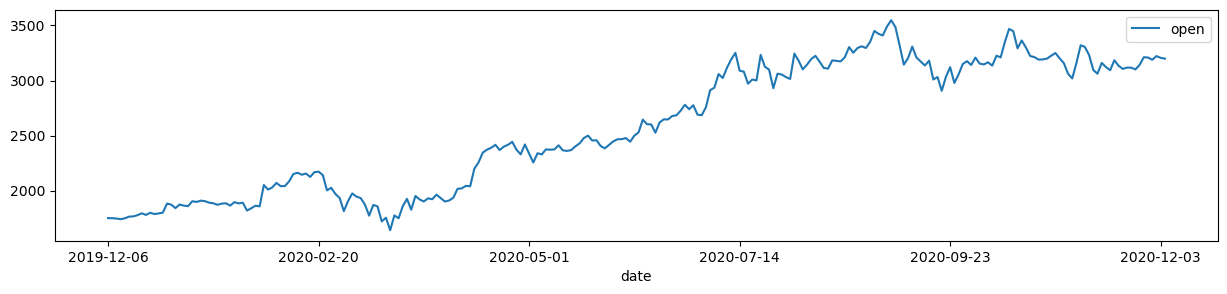

In [23]:
df.plot.line(x='date',y='open',figsize=(15,3))

In [25]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['open'])
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Test Statistic                  -1.082416
p-value                          0.722033
#lags used                       3.000000
number of observations used    248.000000
dtype: float64

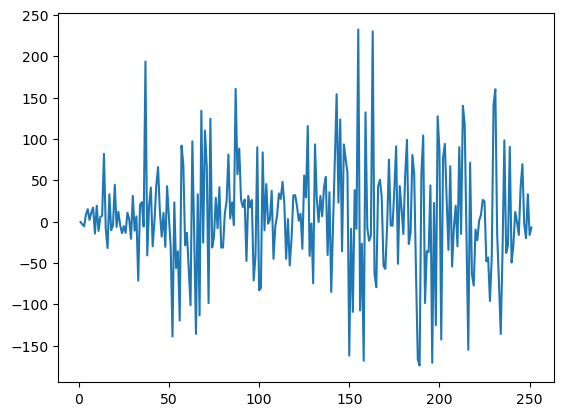

In [27]:
from matplotlib import pyplot

diff=df.open.diff()
pyplot.plot(diff)
pyplot.show()

In [29]:
df['diff_1'] = df['open'].diff()  # 1st order
df['diff_2'] = df['diff_1'].diff() # 2nd order
df

,date,open,diff_1,diff_2
0,2019-12-06,1751.20,NaN,NaN
1,2019-12-09,1750.66,-0.54,NaN
2,2019-12-10,1747.40,-3.26,-2.72
3,2019-12-11,1741.67,-5.73,-2.47
4,2019-12-12,1750.00,8.33,14.06
...,...,...,...,...
247,2020-11-30,3208.48,-2.78,-72.17
248,2020-12-01,3188.50,-19.98,-17.20
249,2020-12-02,3221.65,33.15,53.13
250,2020-12-03,3205.46,-16.19,-49.34


In [31]:
import numpy as np
np.var(df.iloc[:,1:])

open      328694.671168
diff_1      4530.702538
diff_2      9885.803825
dtype: float64

In [33]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df.diff_1.loc[1:,])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Observations of Dickey-fuller test


Test Statistic                -1.101042e+01
p-value                        6.346152e-20
#lags used                     2.000000e+00
number of observations used    2.480000e+02
dtype: float64

<Axes: xlabel='date'>

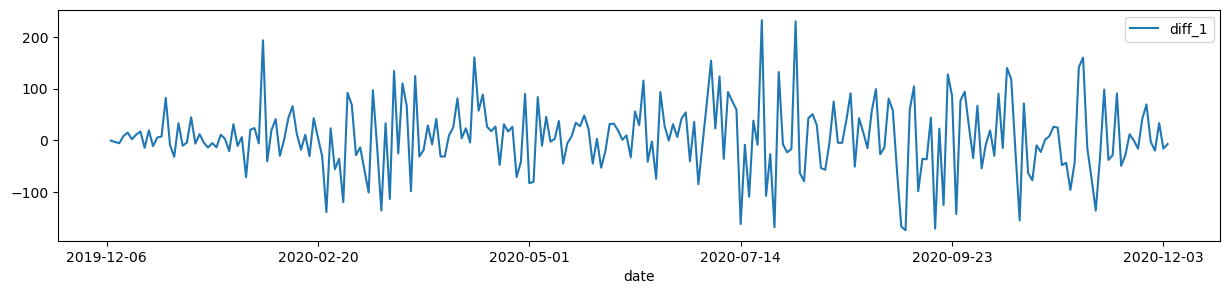

In [37]:
df.plot.line(x='date',y='diff_1',figsize=(15,3))

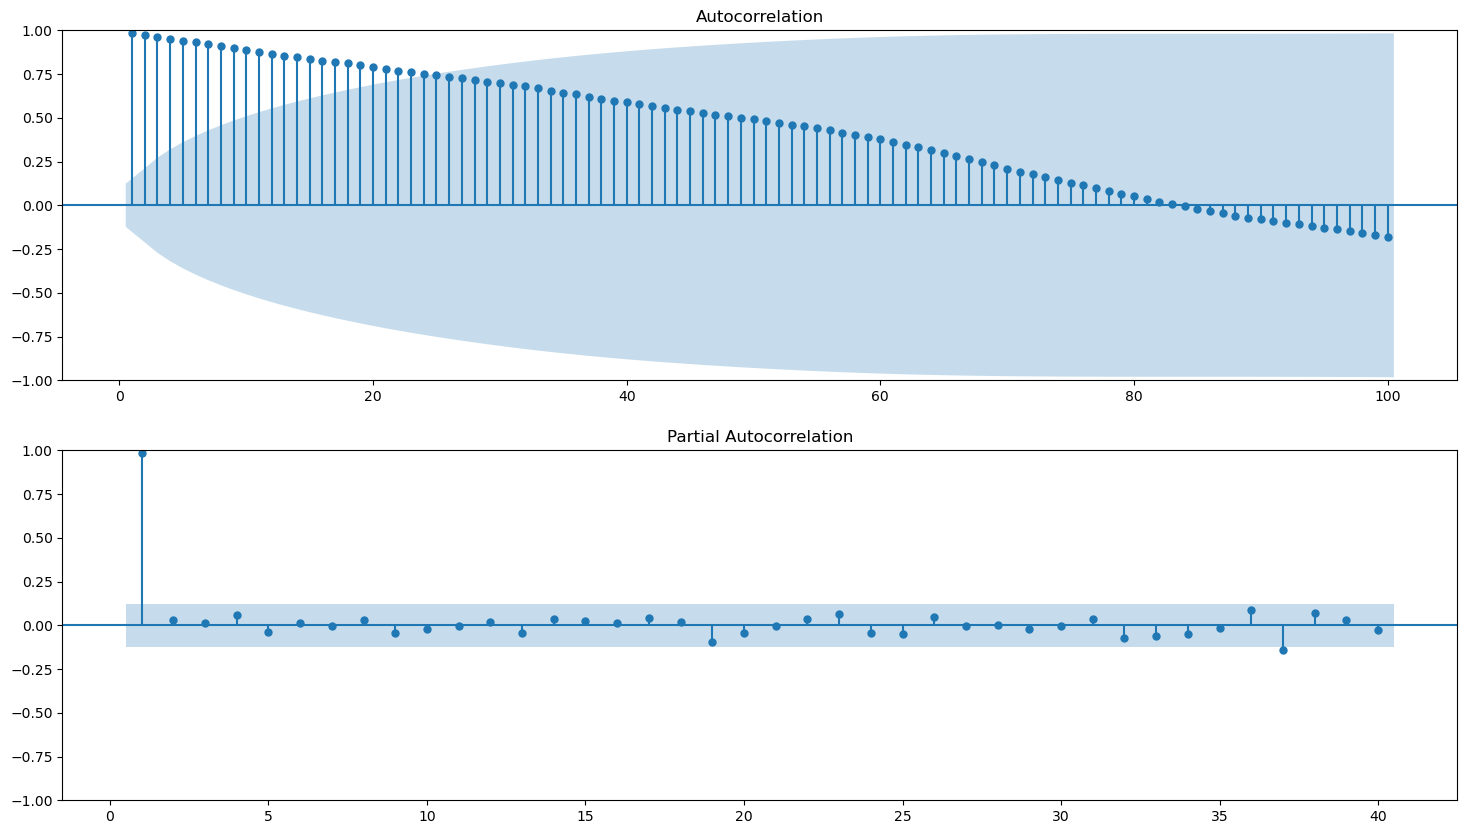

In [39]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
plot_acf(df['open'],lags=100, ax=ax[0],zero=False)  # q = 0
plot_pacf(df['open'],lags=40, ax=ax[1],zero=False)  # p = 2
plt.show()

In [41]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df.open,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series
                      seasonal=False,    # No Seasonality  then below P,D,Q will not be used 
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4689.192, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4360.156, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2849.976, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2849.296, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2850.909, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2850.800, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2851.071, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2851.108, Time=0.49 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2848.036, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2848.817, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2849.702, T

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1419.018
Date:                Tue, 13 Aug 2024   AIC                           2848.036
Time:                        11:29:48   BIC                           2865.684
Sample:                             0   HQIC                          2855.137
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     26.2764     32.827      0.800      0.423     -38.063      90.616
ar.L1          0.0219      0.039      0.564      0.572      -0.054       0.098
ar.L2          0.9677      0.039     24.866      0.000       0.891       1.044
ma.L1          0.9435      0.055     17.210      0.000       0.836       1.051
sigma2      4472.6068    358.134     12.489      0.000    3770.678    5174.536
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 5.47
Prob(Q):                              0.52   Prob(JB):                         0.07
Heteroskedasticity (H):               1.79   Skew:                             0.10
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
import numpy as np
df['Forecast'] = np.round(model.predict_in_sample(),0)
df.iloc[:,[0,1,4]]

,date,open,Forecast
0,2019-12-06,1751.20,2519.0
1,2019-12-09,1750.66,1755.0
2,2019-12-10,1747.40,1755.0
3,2019-12-11,1741.67,1752.0
4,2019-12-12,1750.00,1746.0
...,...,...,...
247,2020-11-30,3208.48,3210.0
248,2020-12-01,3188.50,3202.0
249,2020-12-02,3221.65,3188.0
250,2020-12-03,3205.46,3214.0


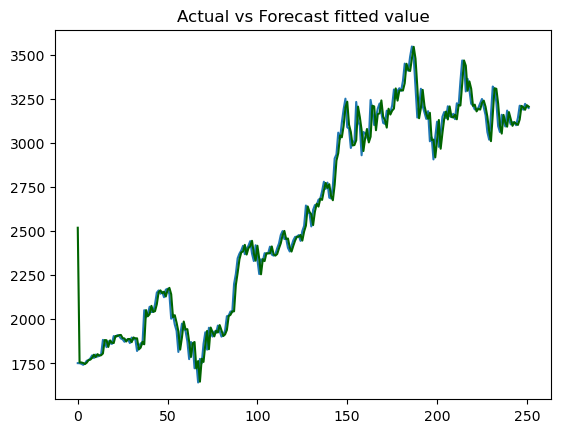

In [47]:
# Plot
plt.plot(df.open)
plt.plot(df.Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

In [49]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'MAPE':mape})

forecast_accuracy(df.open,df.Forecast)

{'MAPE': 2.084920684148893}

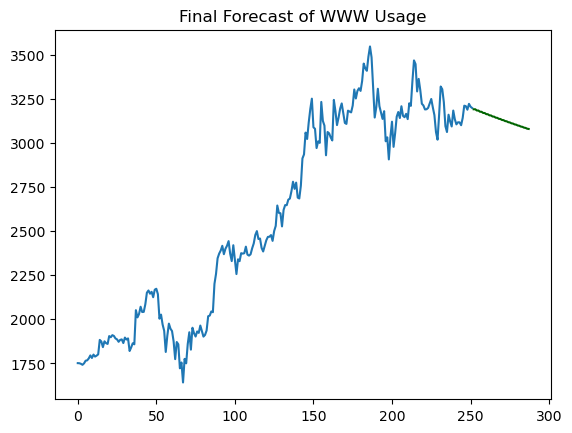

In [51]:
n_periods = 36
fc = model.predict(n_periods=n_periods)

index_of_fc = np.arange(len(df.open), len(df.open)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)

# Plot
plt.plot(df.open)
plt.plot(fc_series, color='darkgreen')
plt.title("Final Forecast of WWW Usage")
plt.show()